#**Sahabat Gula**

import library

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import dataset

In [32]:
df = pd.read_csv("SahabatGula.csv")
df.head()

,Jenis Kelamin,Usia,Berat (kg),Tinggi (cm),Lingkar Pinggang (cm),Riwayat Tekanan Darah Tinggi,Riwayat Gula Darah Tinggi,Keluarga dengan Riwayat Diabetes,Tingkat Aktivitas,Konsumsi Sayur/Buah,BMI,Skor Indeks Diabetes,Kategori Risiko,Kalori Harian
0,Male,45,80,175,95,1,1,1,Berat,1,26.12,9,Sedikit Tinggi,2887
1,Male,30,65,160,70,0,0,0,NaN,1,25.39,4,Rendah,1806
2,Female,60,90,170,100,1,1,1,Ringan,0,31.14,10,Sedikit Tinggi,2065
3,Male,35,50,155,65,0,0,0,Ringan,1,20.81,3,Rendah,1786
4,Male,25,70,180,85,0,0,1,NaN,1,21.60,4,Rendah,2046


cek dulu format datasetnya, mungkin ada yang masih tipe object atau kategorikal

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Jenis Kelamin                     500 non-null    object 
 1   Usia                              500 non-null    int64  
 2   Berat (kg)                        500 non-null    int64  
 3   Tinggi (cm)                       500 non-null    int64  
 4   Lingkar Pinggang (cm)             500 non-null    int64  
 5   Riwayat Tekanan Darah Tinggi      500 non-null    int64  
 6   Riwayat Gula Darah Tinggi         500 non-null    int64  
 7   Keluarga dengan Riwayat Diabetes  500 non-null    int64  
 8   Tingkat Aktivitas                 411 non-null    object 
 9   Konsumsi Sayur/Buah               500 non-null    int64  
 10  BMI                               500 non-null    float64
 11  Skor Indeks Diabetes              500 non-null    int64  
 12  Kategori

kalo ada ubah ke numerik dengan encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Kolom-kolom kategorikal yang akan di-encode
categorical_cols = ['Jenis Kelamin', 'Tingkat Aktivitas', 'Kategori Risiko'] # Ganti dengan nama kolom kategorikal yang sebenarnya

# Lakukan encoding untuk setiap kolom kategorikal
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Tampilkan df setelah encoding
df.head()

,Jenis Kelamin,Usia,Berat (kg),Tinggi (cm),Lingkar Pinggang (cm),Riwayat Tekanan Darah Tinggi,Riwayat Gula Darah Tinggi,Keluarga dengan Riwayat Diabetes,Tingkat Aktivitas,Konsumsi Sayur/Buah,BMI,Skor Indeks Diabetes,Kategori Risiko,Kalori Harian
0,1,45,80,175,95,1,1,1,0,1,26.12,9,2,2887
1,1,30,65,160,70,0,0,0,4,1,25.39,4,0,1806
2,0,60,90,170,100,1,1,1,1,0,31.14,10,2,2065
3,1,35,50,155,65,0,0,0,1,1,20.81,3,0,1786
4,1,25,70,180,85,0,0,1,4,1,21.60,4,0,2046


berdasarkan encoding male = 1 dan female = 0,  sedangkan yang lain kalo 1 berarti ya dan 0 berarti tidak

lakukan pengecekan lagi, kira-kira ada gak yang missing value (NaaN) di dataset

In [35]:
df.describe(include="all")

,Jenis Kelamin,Usia,Berat (kg),Tinggi (cm),Lingkar Pinggang (cm),Riwayat Tekanan Darah Tinggi,Riwayat Gula Darah Tinggi,Keluarga dengan Riwayat Diabetes,Tingkat Aktivitas,Konsumsi Sayur/Buah,BMI,Skor Indeks Diabetes,Kategori Risiko,Kalori Harian
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,47.456000,75.096000,167.274000,86.580000,0.462000,0.502000,0.522000,2.028000,0.500000,26.968520,6.060000,0.808000,2303.234000
std,0.500465,13.882562,15.147729,7.564481,11.182204,0.499053,0.500497,0.500016,1.364896,0.500501,5.860115,2.299342,0.978289,461.138583
min,0.000000,25.000000,50.000000,150.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.100000,0.000000,0.000000,1199.000000
25%,0.000000,35.000000,62.000000,161.000000,78.000000,0.000000,0.000000,0.000000,1.000000,0.000000,22.090000,4.000000,0.000000,1943.000000
50%,1.000000,47.000000,75.000000,167.000000,86.000000,0.000000,1.000000,1.000000,2.000000,0.500000,26.550000,6.000000,0.000000,2282.000000
75%,1.000000,59.000000,88.000000,174.000000,94.000000,1.000000,1.000000,1.000000,3.000000,1.000000,31.087500,8.000000,2.000000,2614.250000
max,1.000000,78.000000,100.000000,180.000000,110.000000,1.000000,1.000000,1.000000,4.000000,1.000000,43.560000,14.000000,2.000000,3698.000000


In [36]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0


keknya gada yang missing values

Lakukan Cleaning dengan mengecek outlier (data yang diluar skala semestinya) di setiap kolom dataset

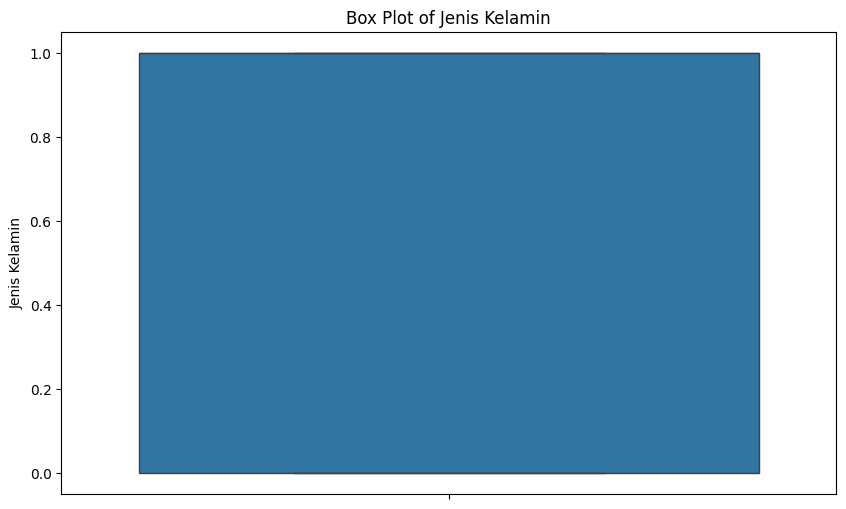

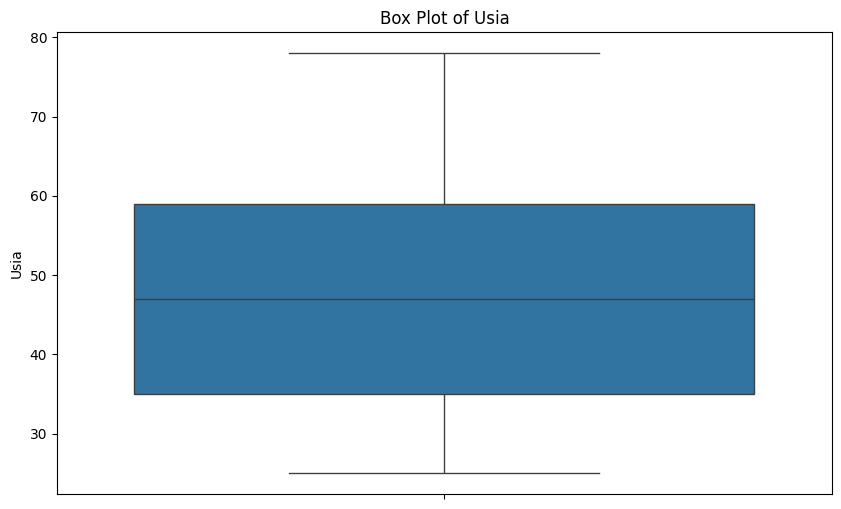

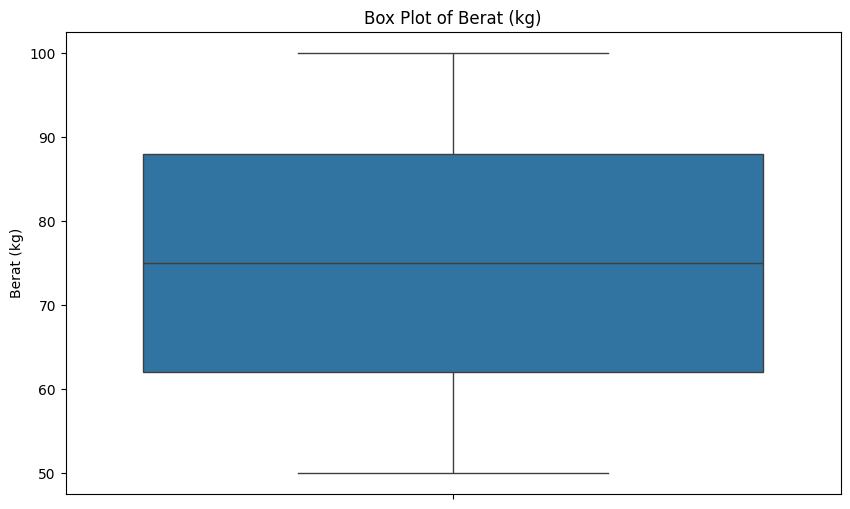

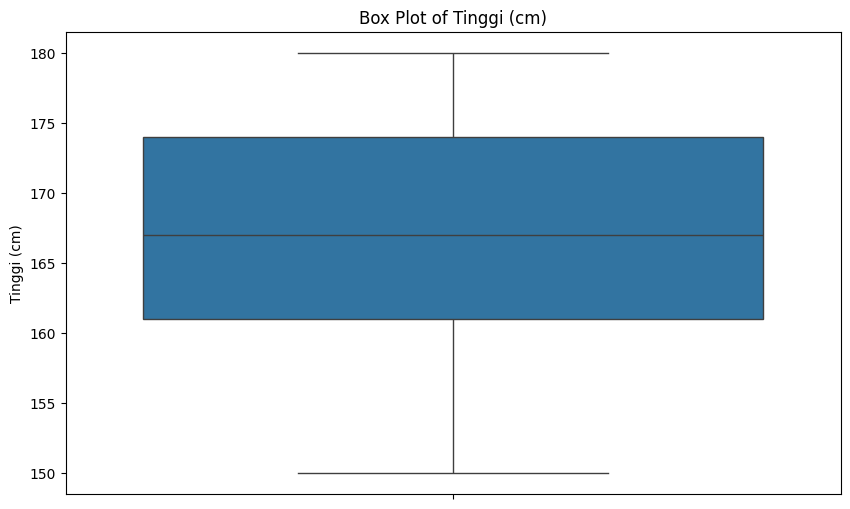

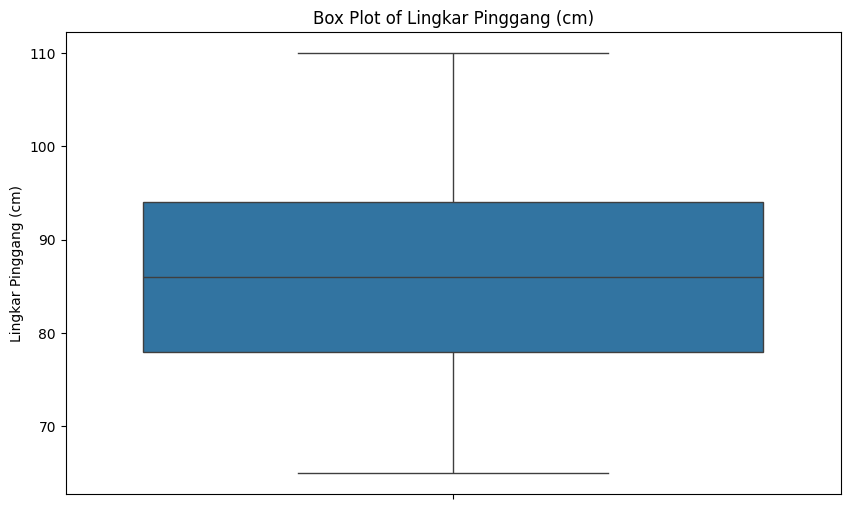

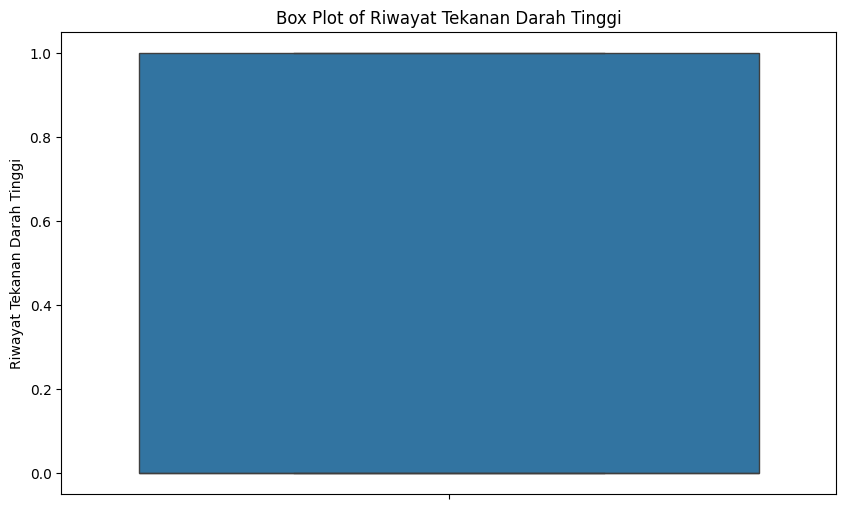

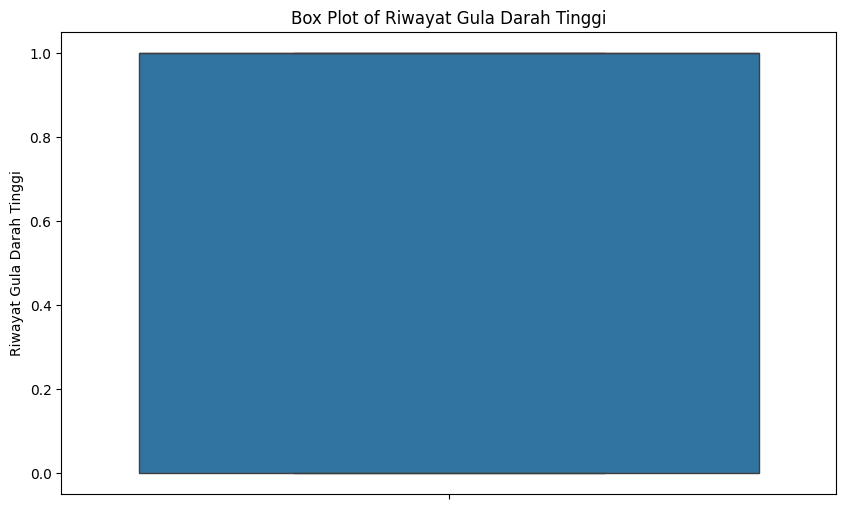

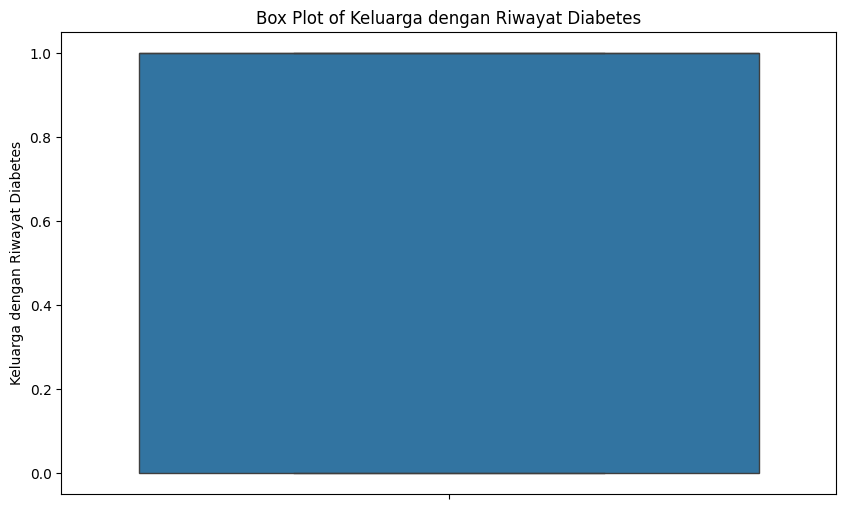

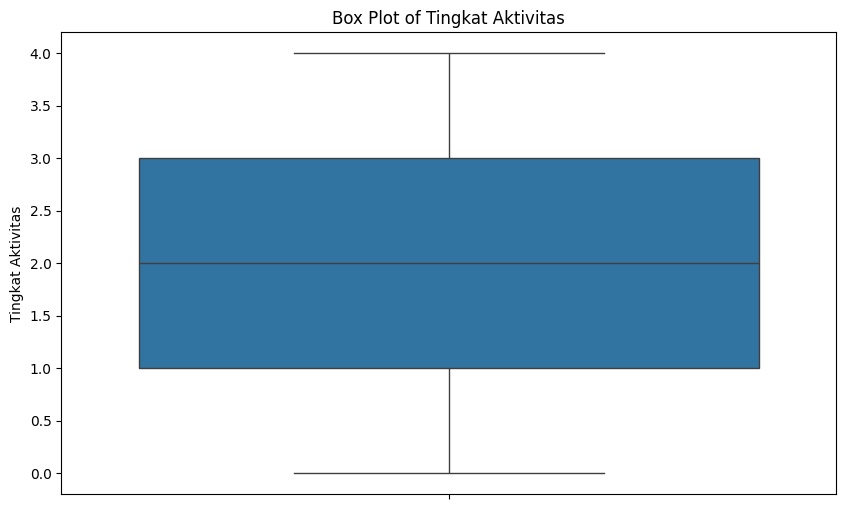

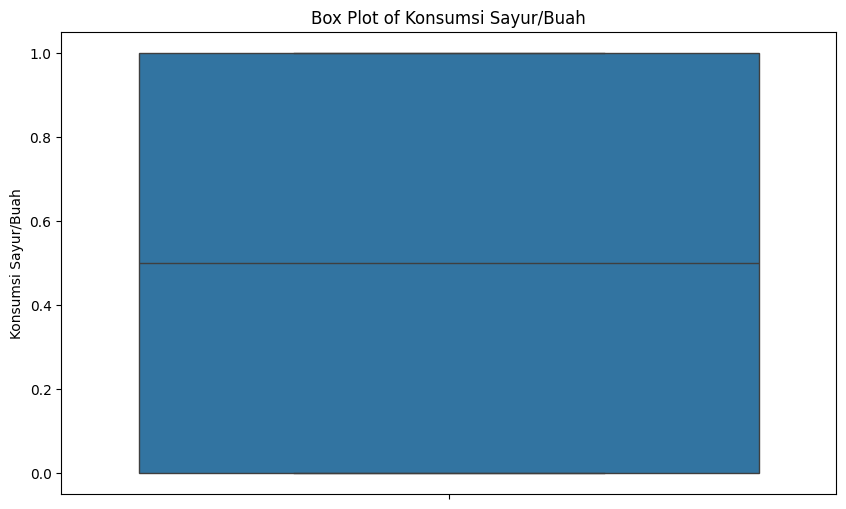

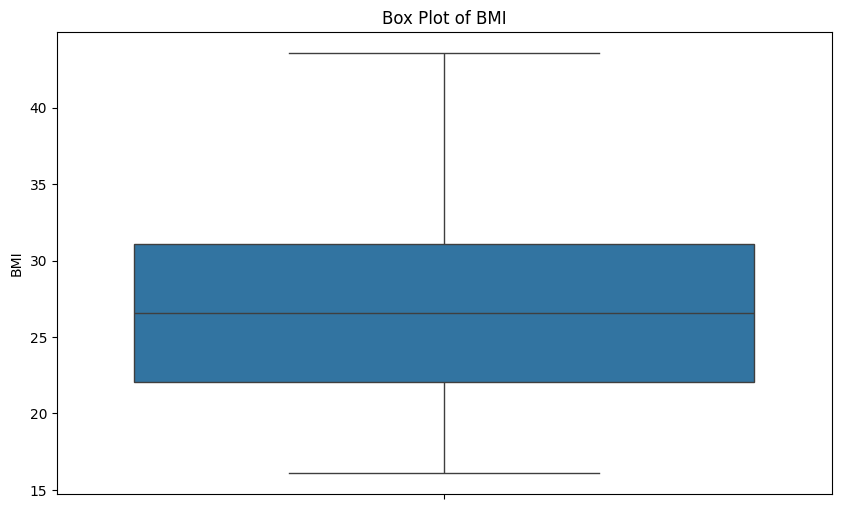

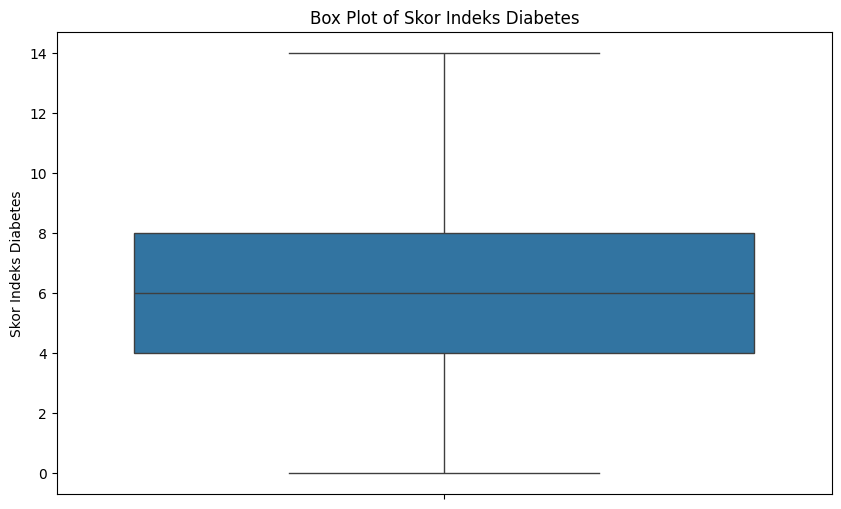

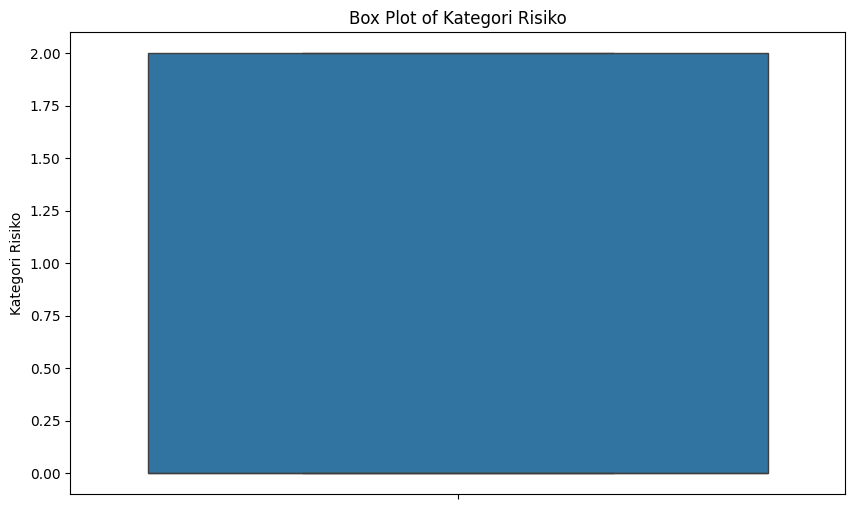

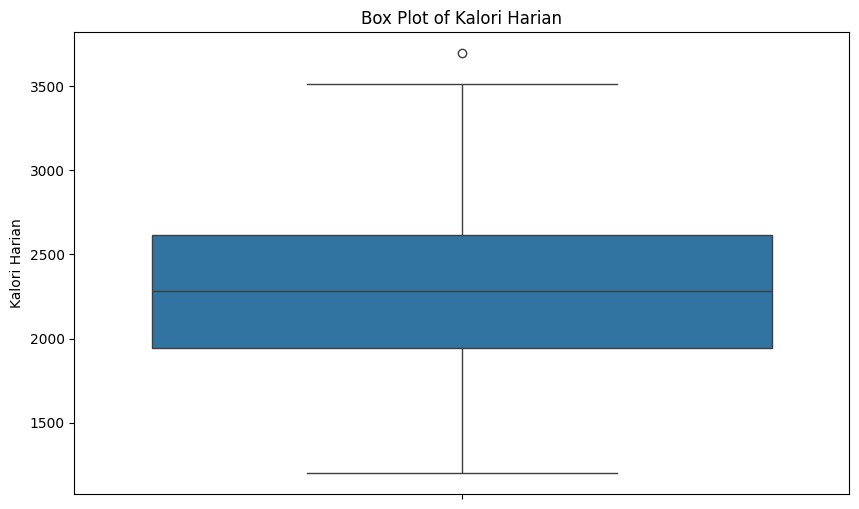

In [37]:
#untuk mengecek outlier pada kolom tertentu
for column in df.select_dtypes(include=['number']):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

keknya ada tuh di bagian box plot kalori harian, kita hapus dia agar datasetnya makin akurat dan mengurangi overfitting.

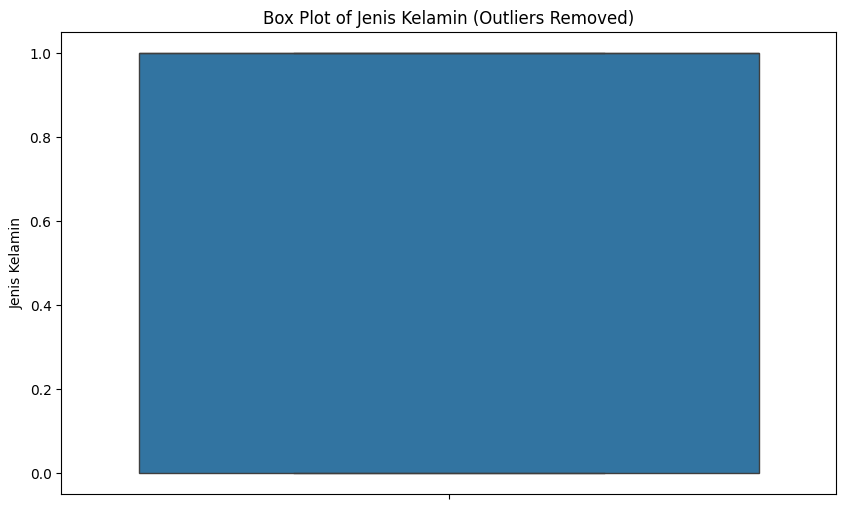

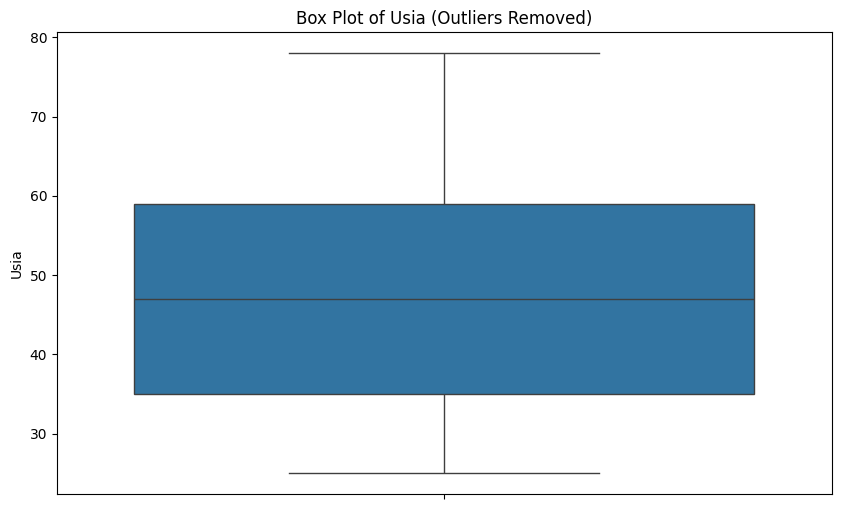

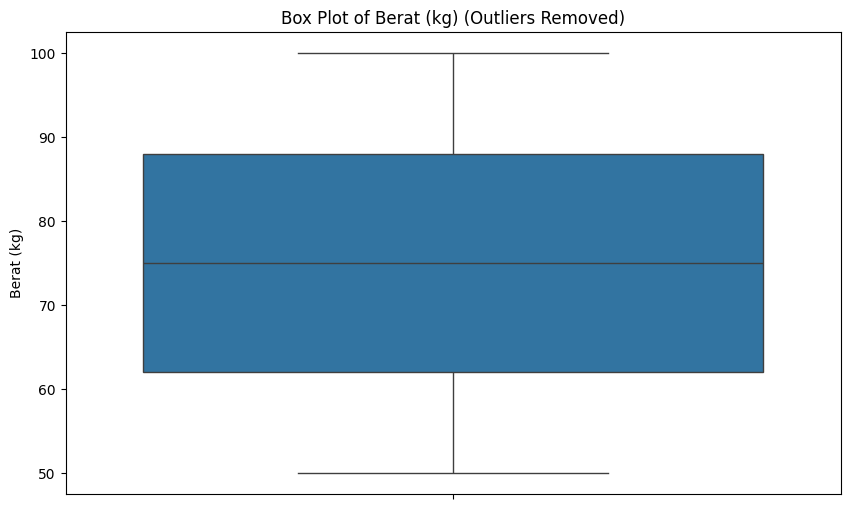

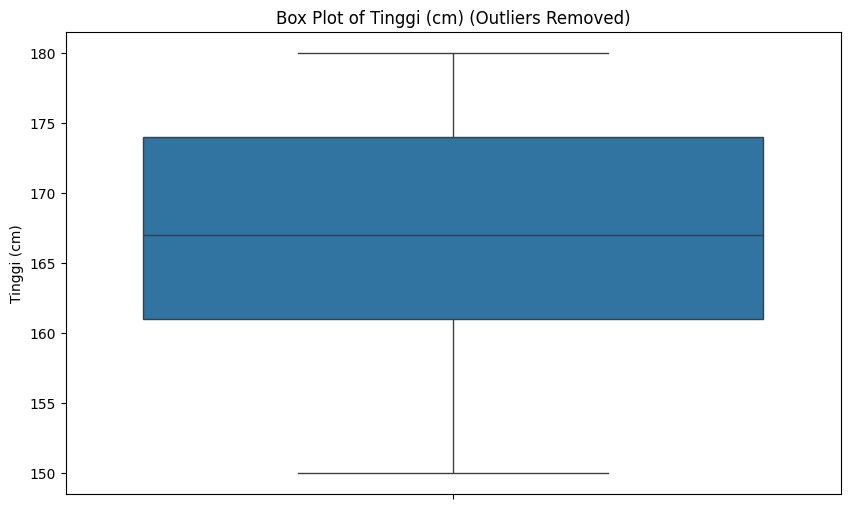

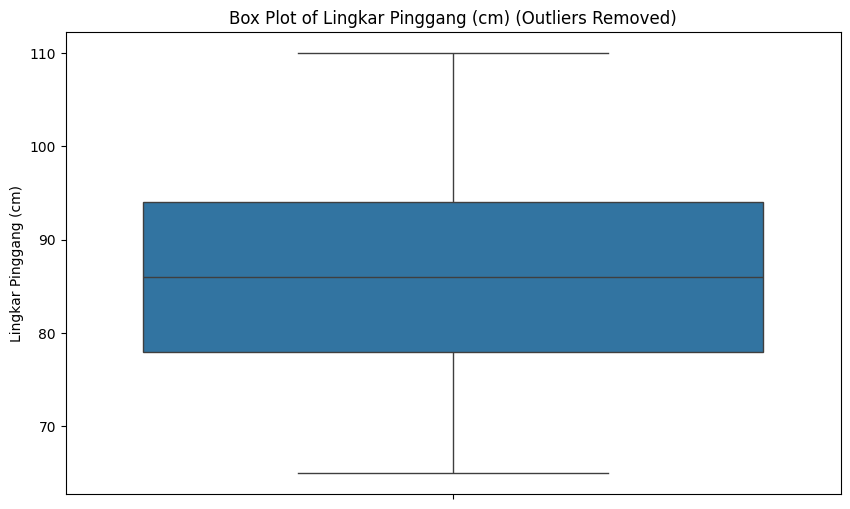

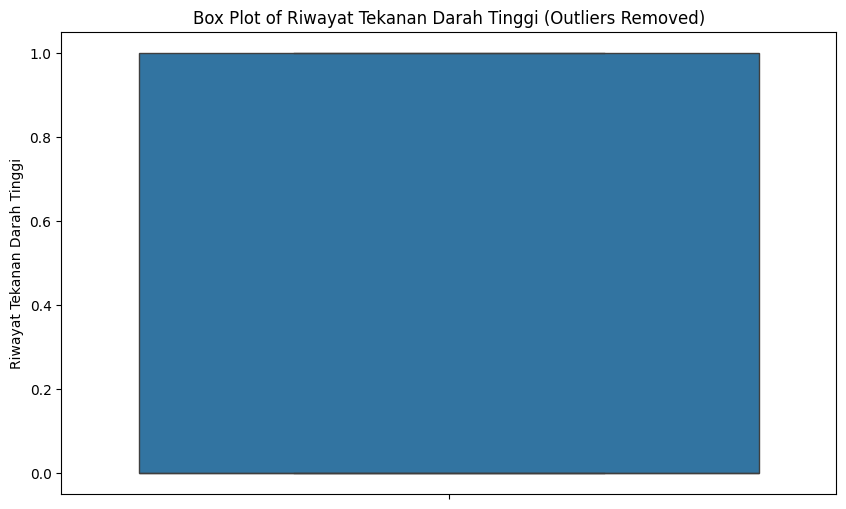

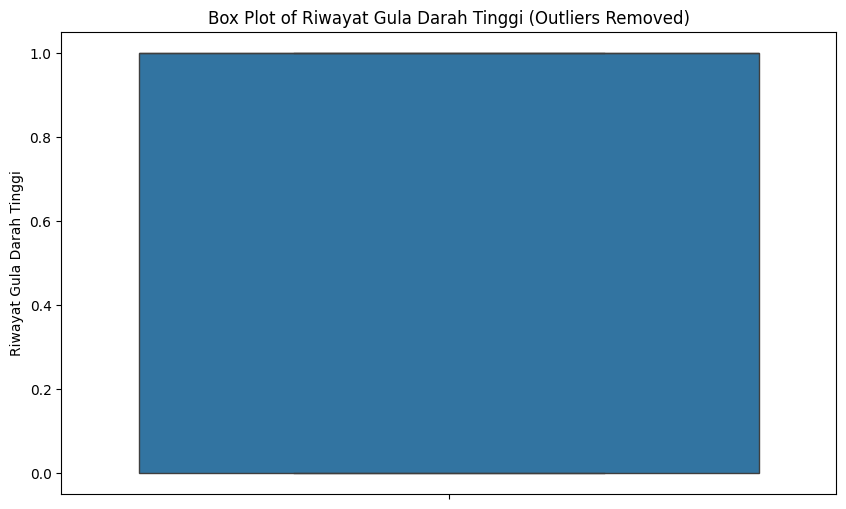

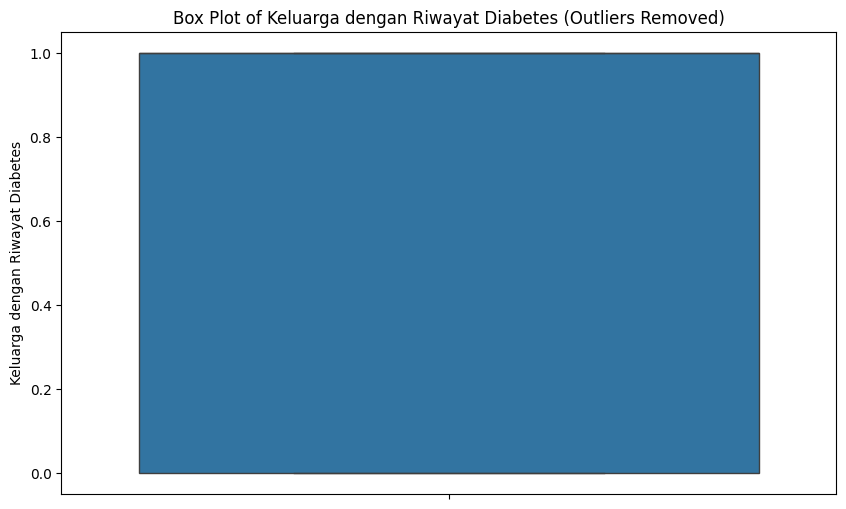

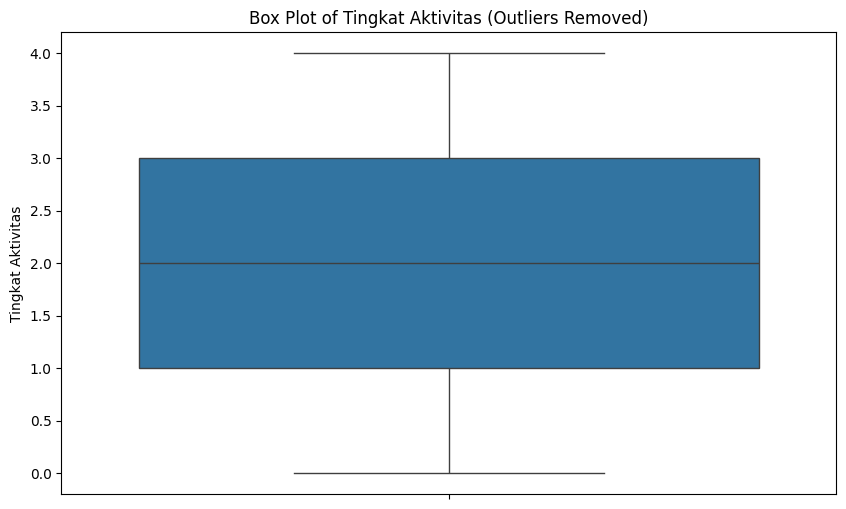

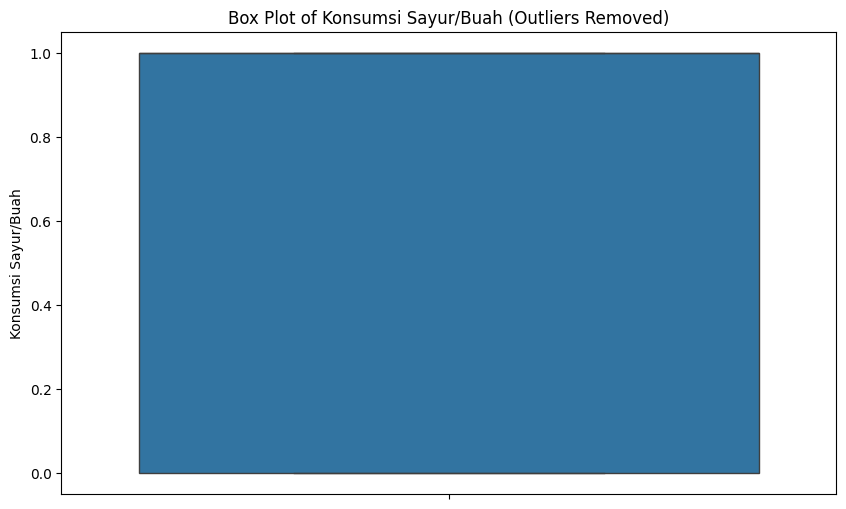

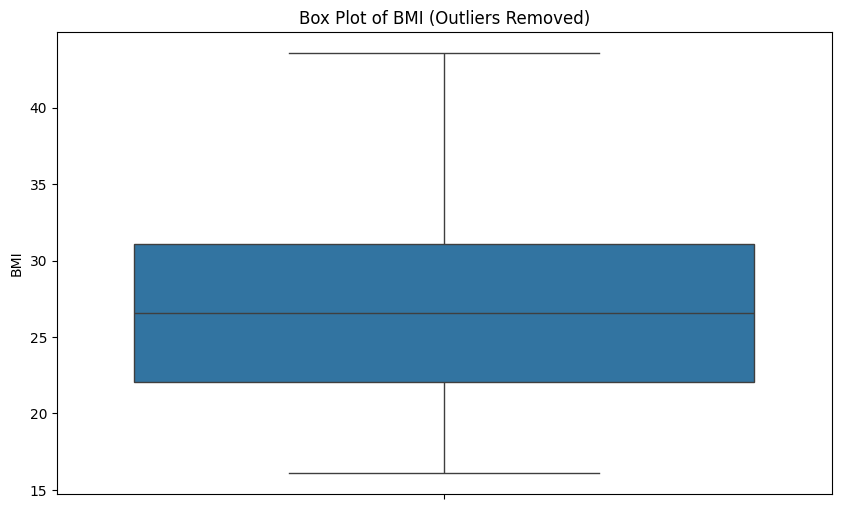

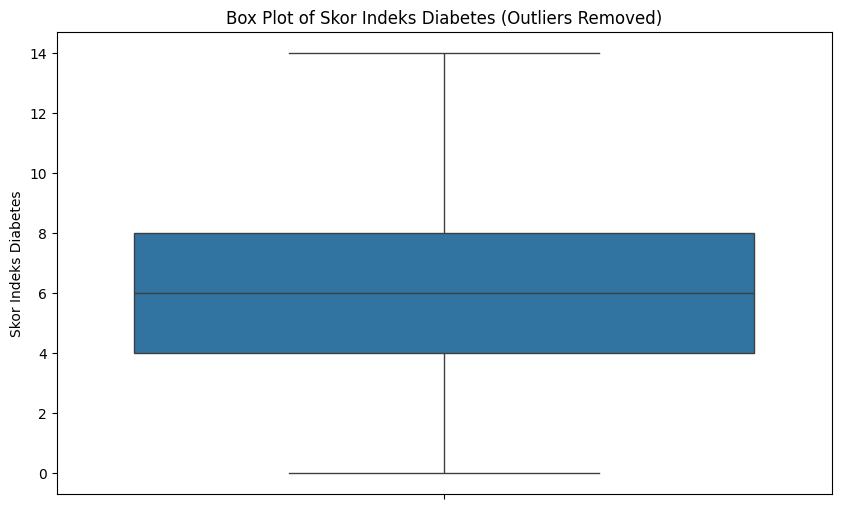

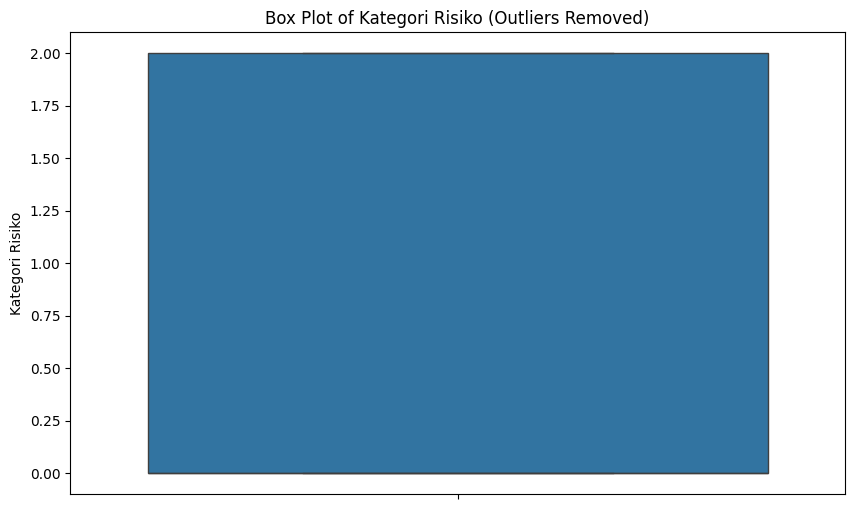

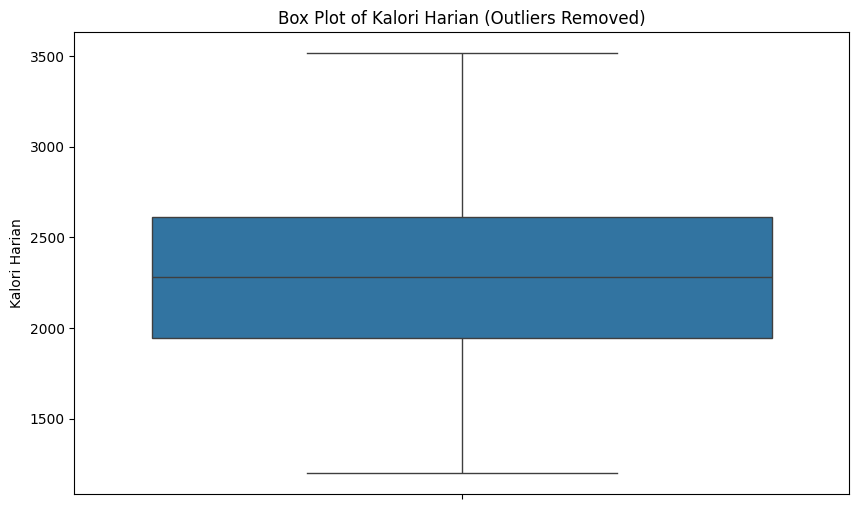

In [38]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Remove outliers for each numerical column
for column in df.select_dtypes(include=['number']):
    df = remove_outliers_iqr(df, column)

# Verify if outliers are removed (optional)
for column in df.select_dtypes(include=['number']):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df[column])
    plt.title(f'Box Plot of {column} (Outliers Removed)')
    plt.show()

okee udah rapi

kita pastiin dulu cuma tipe numerik yang diproses, walaupun semua sudah numerik sih hehe.

In [39]:
from sklearn.preprocessing import StandardScaler

# Memastikan hanya data dengan tipe numerikal yang akan diproses
numeric_features = df.select_dtypes(include=['number']).columns
numeric_features

# Standardisasi fitur numerik
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

lakukan proses cleaning lagi dengan ngecek tidak ada baris yang duplikat agar tidak terjadi overfitting.

In [40]:
# Mengidentifikasi baris duplikat
duplicates = df.duplicated()

print("Baris duplikat:")
print(df[duplicates])

Baris duplikat:
Empty DataFrame
Columns: [Jenis Kelamin, Usia, Berat (kg), Tinggi (cm), Lingkar Pinggang (cm), Riwayat Tekanan Darah Tinggi, Riwayat Gula Darah Tinggi, Keluarga dengan Riwayat Diabetes, Tingkat Aktivitas, Konsumsi Sayur/Buah, BMI, Skor Indeks Diabetes, Kategori Risiko, Kalori Harian]
Index: []


kalo udah kita lakuin proses expa

In [41]:
df.describe(include='all')

,Jenis Kelamin,Usia,Berat (kg),Tinggi (cm),Lingkar Pinggang (cm),Riwayat Tekanan Darah Tinggi,Riwayat Gula Darah Tinggi,Keluarga dengan Riwayat Diabetes,Tingkat Aktivitas,Konsumsi Sayur/Buah,BMI,Skor Indeks Diabetes,Kategori Risiko,Kalori Harian
count,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02
mean,1.281540e-16,-2.278293e-16,-1.352737e-16,1.580566e-15,1.032352e-16,1.601925e-17,8.632596e-17,1.210343e-16,1.566327e-16,8.543600e-17,1.922310e-16,-1.708720e-16,-2.313892e-17,2.029105e-16
std,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00
min,-1.010071e+00,-1.624066e+00,-1.657335e+00,-2.284786e+00,-1.930018e+00,-9.246722e-01,-1.002006e+00,-1.047205e+00,-1.485869e+00,-1.002006e+00,-1.854159e+00,-2.637023e+00,-8.281541e-01,-2.410766e+00
25%,-1.010071e+00,-9.021625e-01,-8.634689e-01,-8.282017e-01,-7.660141e-01,-9.246722e-01,-1.002006e+00,-1.047205e+00,-7.532122e-01,-1.002006e+00,-8.332253e-01,-8.970237e-01,-8.281541e-01,-7.845303e-01
50%,9.900297e-01,-3.587817e-02,-3.446981e-03,-3.370126e-02,-4.970389e-02,-9.246722e-01,9.979980e-01,9.549227e-01,-2.055550e-02,9.979980e-01,-7.179331e-02,-2.702404e-02,-8.281541e-01,-4.254669e-02
75%,9.900297e-01,8.304061e-01,8.565749e-01,8.932160e-01,6.666064e-01,1.081464e+00,9.979980e-01,9.549227e-01,7.121012e-01,9.979980e-01,7.075648e-01,8.429757e-01,1.217632e+00,6.775495e-01
max,9.900297e-01,2.202023e+00,1.650441e+00,1.687716e+00,2.099227e+00,1.081464e+00,9.979980e-01,9.549227e-01,1.444758e+00,9.979980e-01,2.833941e+00,3.452975e+00,1.217632e+00,2.658361e+00


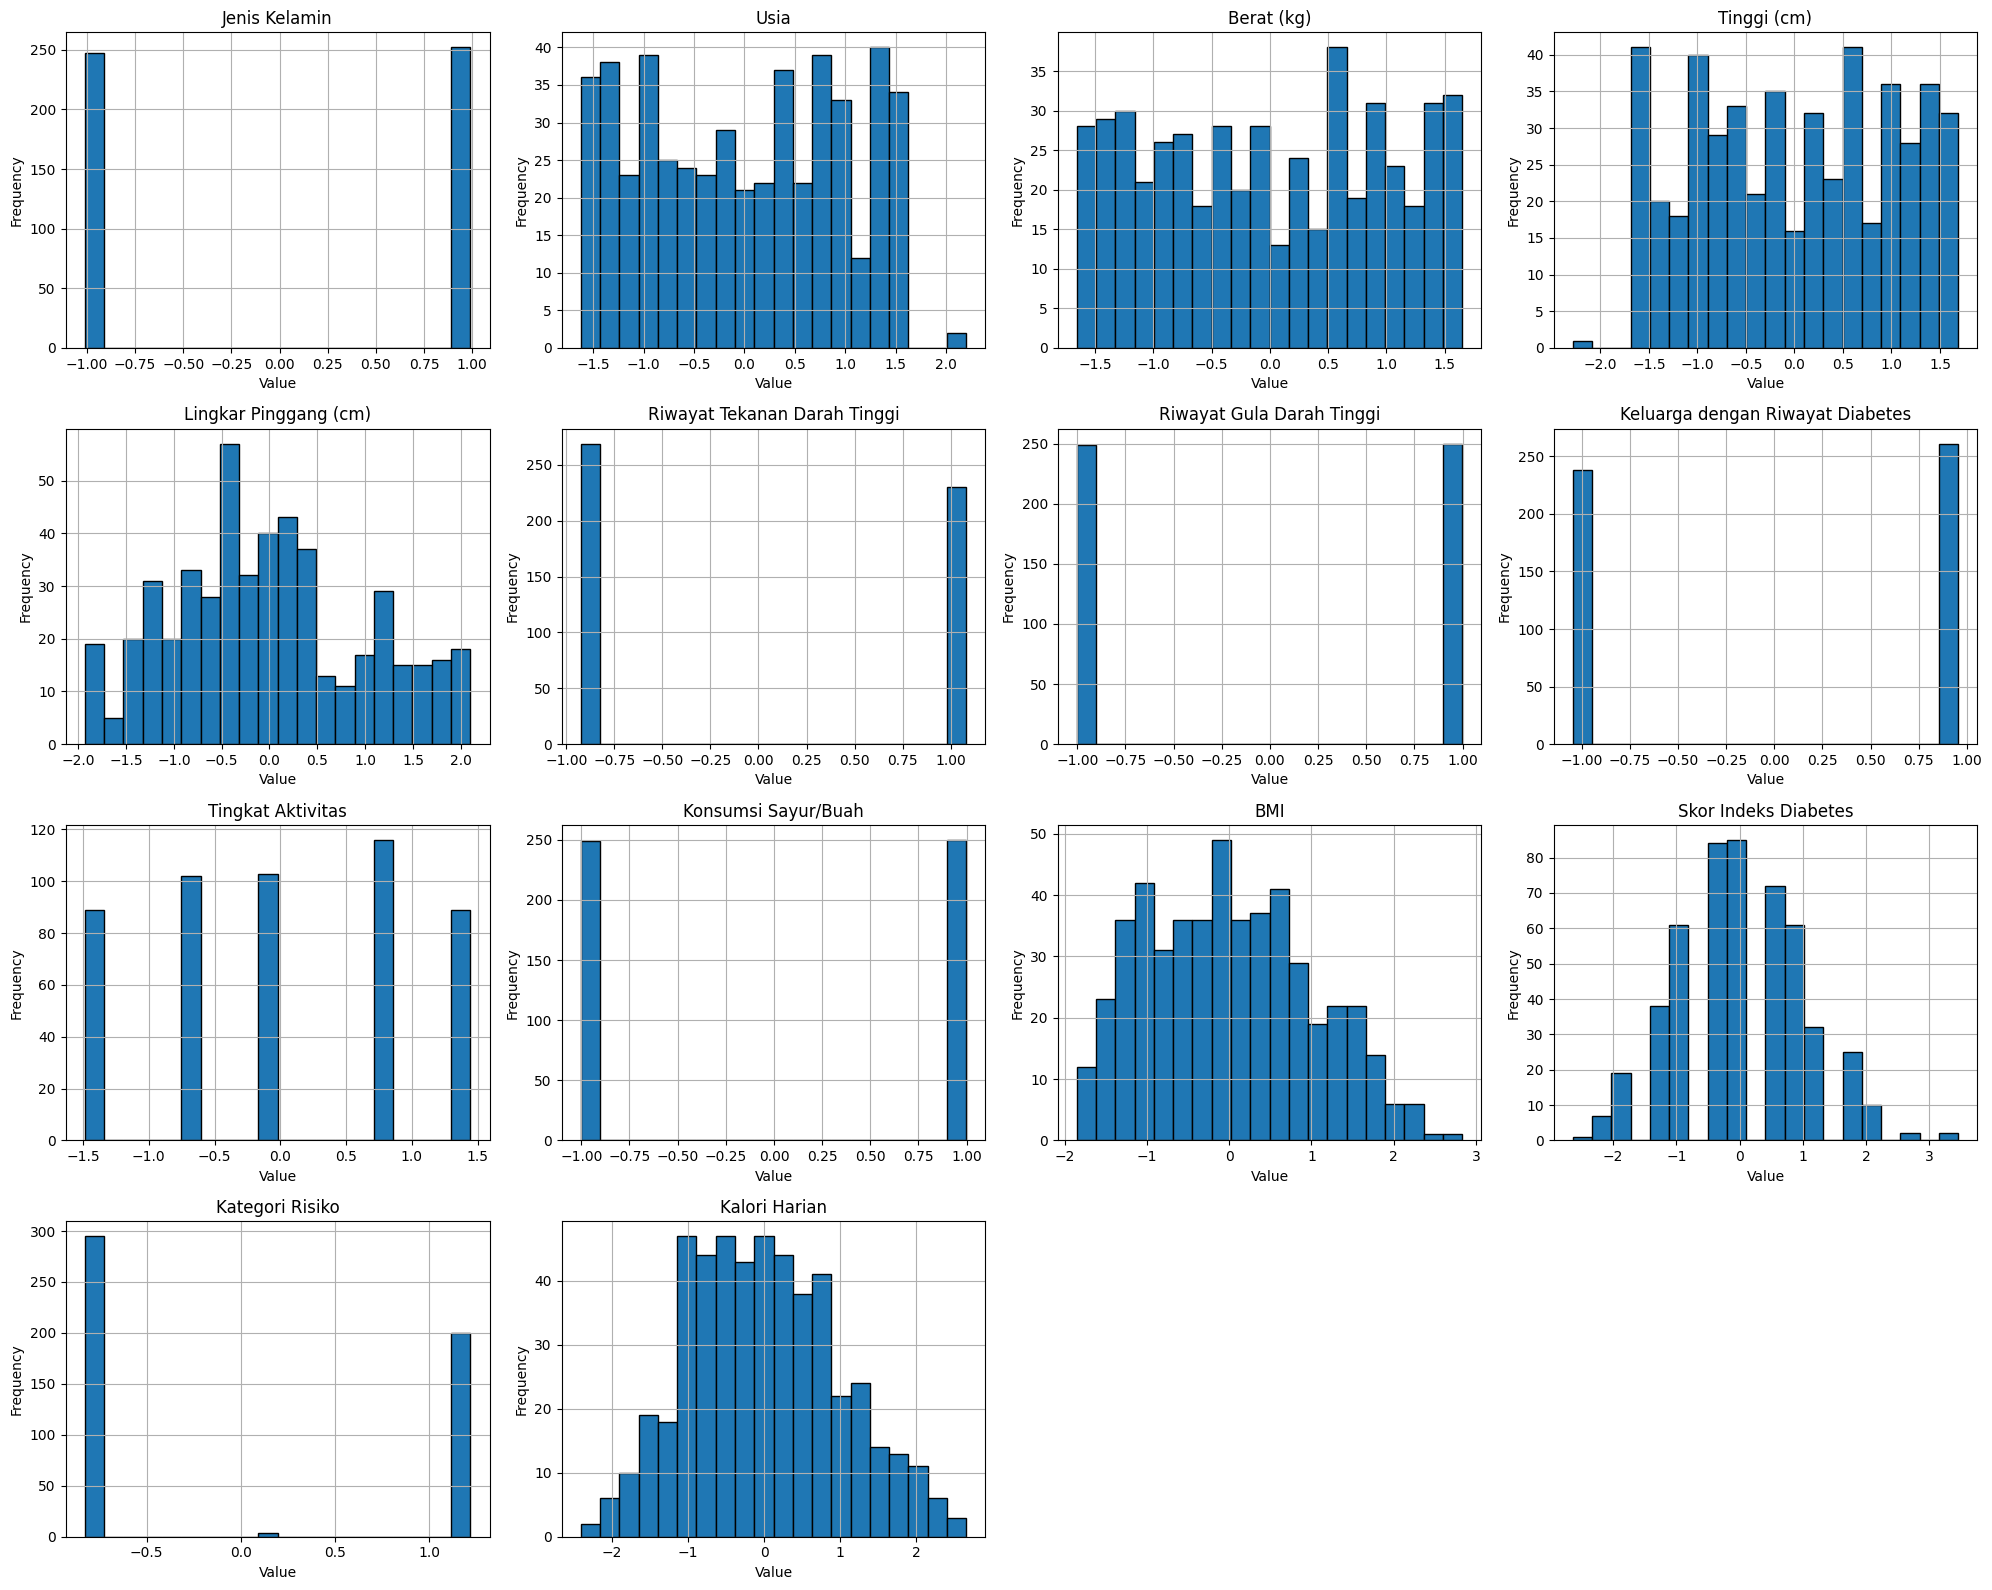

In [42]:
# Menghitung jumlah variabel
num_vars = df.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4  # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(df.columns):
    df[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

In [43]:
target_corr = df.corr()['Skor Indeks Diabetes']

# Mengurutkan hasil korelasi berdasarkan kekuatan korelasi
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

# Menentukan threshold untuk korelasi
correlation_threshold = 0.05  # Contoh: Hapus variabel dengan korelasi absolut di bawah 0.05

# Mengidentifikasi kolom yang akan dihapus
columns_to_drop = target_corr_sorted[target_corr_sorted < correlation_threshold].index

# Menghapus kolom
df = df.drop(columns=columns_to_drop)

print(f"Kolom yang dihapus: {columns_to_drop.tolist()}")


Kolom yang dihapus: ['Kalori Harian', 'Tinggi (cm)']


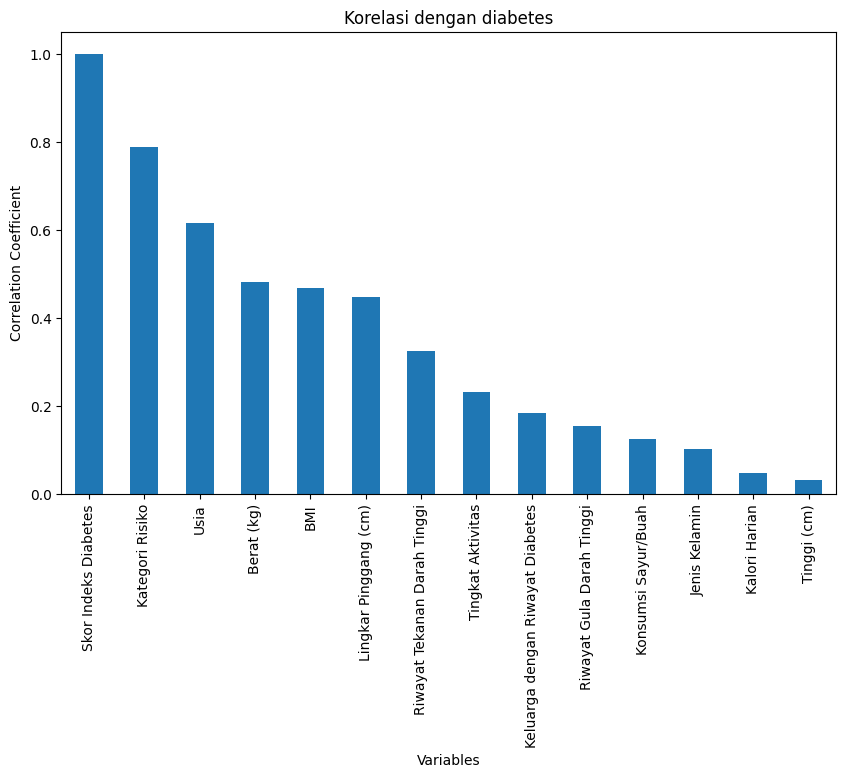

In [44]:
plt.figure(figsize=(10, 6))
target_corr_sorted.plot(kind='bar')
plt.title(f'Korelasi dengan diabetes')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

In [45]:
# prompt: pisahkan data latih dan data test dengan dataset yang sudah di drop beberapa itemnya yang tadi

from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target (y)
X = df.drop('Skor Indeks Diabetes', axis=1)
y = df['Skor Indeks Diabetes']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # test_size bisa diubah sesuai kebutuhan

# Sekarang Anda memiliki X_train, X_test, y_train, dan y_test
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)


Ukuran X_train: (399, 11)
Ukuran X_test: (100, 11)
Ukuran y_train: (399,)
Ukuran y_test: (100,)


In [46]:
import sklearn
from sklearn import datasets

# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['Skor Indeks Diabetes'])
y = df['Skor Indeks Diabetes']

from sklearn.model_selection import train_test_split

# membagi dataset menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# menghitung panjang/jumlah data
print("Jumlah data: ",len(X))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data latih: ",len(x_train))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data test: ",len(x_test))

Jumlah data:  499
Jumlah data latih:  399
Jumlah data test:  100


In [47]:
# Inisiasi dan fit scaler menggunakan data training
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [48]:
from sklearn import linear_model
lars = linear_model.Lars(n_nonzero_coefs=1).fit(x_train, y_train)

pred_lars = lars.predict(x_test)

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_lars = mean_absolute_error(y_test, pred_lars)
mse_lars = mean_squared_error(y_test, pred_lars)
r2_lars = r2_score(y_test, pred_lars)

print(f"MAE: {mae_lars}")
print(f"MSE: {mse_lars}")
print(f"R²: {r2_lars}")

MAE: 0.4615017872673781
MSE: 0.4840193649112267
R²: 0.40463976342857444


In [50]:
# Membuat dictionary untuk menyimpan hasil evaluasi
data = {
    'MAE': [mae_lars],
    'MSE': [mse_lars],
    'R2': [r2_lars]
}

# Konversi dictionary menjadi DataFrame
df_results = pd.DataFrame(data, index=['Lars'])
df_results

,MAE,MSE,R2
Lars,0.461502,0.484019,0.40464


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

LR = LinearRegression().fit(x_train, y_train)

pred_LR = LR.predict(x_test)

mae_LR = mean_absolute_error(y_test, pred_LR)
mse_LR = mean_squared_error(y_test, pred_LR)
r2_LR = r2_score(y_test, pred_LR)

print(f"MAE: {mae_LR}")
print(f"MSE: {mse_LR}")
print(f"R²: {r2_LR}")

MAE: 0.25323905111845463
MSE: 0.10845832246714426
R²: 0.8665925845053286


In [52]:
df_results.loc['Linear Regression'] = [mae_LR, mse_LR, r2_LR]
df_results

,MAE,MSE,R2
Lars,0.461502,0.484019,0.404640
Linear Regression,0.253239,0.108458,0.866593


In [53]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(random_state=184)
GBR.fit(x_train, y_train)

pred_GBR = GBR.predict(x_test)

mae_GBR = mean_absolute_error(y_test, pred_GBR)
mse_GBR = mean_squared_error(y_test, pred_GBR)
r2_GBR = r2_score(y_test, pred_GBR)

print(f"MAE: {mae_GBR}")
print(f"MSE: {mse_GBR}")
print(f"R²: {r2_GBR}")

MAE: 0.19499733372115854
MSE: 0.055555948841523935
R²: 0.9316642984908133


In [54]:
df_results.loc['GradientBoostingRegressor'] = [mae_GBR, mse_GBR, r2_GBR]
df_results

,MAE,MSE,R2
Lars,0.461502,0.484019,0.404640
Linear Regression,0.253239,0.108458,0.866593
GradientBoostingRegressor,0.194997,0.055556,0.931664


**note** : berdasarkan encoding male = 1 dan female = 0,  sedangkan yang lain kalo 1 berarti ya dan 0 berarti tidak

In [63]:
import numpy as np

# Input features for prediction (replace with your actual values)
jenis_kelamin = 1 #@param {type:"integer"}
umur = 45 #@param {type:"integer"}
berat_badan = 80 #@param {type:"number"}
tinggi_badan = 175 #@param {type:"number"}
lingkar_pinggang = 95  #@param {type:"number"}
riwayat_tekanan_darah_tinggi = 1 #@param {type:"integer"}
riwayat_gula_darah_tinggi = 1 #@param {type:"integer"}
keluarga_dengan_riwayat_diabetes = 1 #@param {type:"integer"}
tingkat_aktivitas = 3 #@param {type:"integer"}
konsumsi_buah_sayur = 1  #@param {type:"number"}


# Get the list of features used during training
training_features = X.columns.tolist() # X is your training data without the target variable

# Create a dictionary to hold the input features
input_data_dict = {
    'Jenis Kelamin': jenis_kelamin,
    'Umur': umur,
    'Berat (kg)': berat_badan,
    'Tinggi (cm)': tinggi_badan,
    'Lingkar Pinggang': lingkar_pinggang,
    'Riwayat Tekanan Darah Tinggi' : riwayat_tekanan_darah_tinggi,
    'Riwayat Gula Darah Tinggi' : riwayat_gula_darah_tinggi,
    'Riwayat Diabetes Keluarga': keluarga_dengan_riwayat_diabetes,
    'Tingkat Aktivitas': tingkat_aktivitas,
    'Konsumsi Buah/Sayur': konsumsi_buah_sayur,
}

# Ensure all features from training are present in the input data
for feature in training_features:
    if feature not in input_data_dict:
        input_data_dict[feature] = df[feature].mean() # Impute with mean for missing features

# Create a DataFrame with the correct feature order and values
input_data = pd.DataFrame([input_data_dict], columns=training_features)


# Scale the input data using the same scaler used for training
input_data_scaled = scaler.transform(input_data)

# Make prediction using the trained GradientBoostingRegressor model
predicted_diabetes_score = GBR.predict(input_data_scaled)

print(f"Predicted Diabetes Score: {predicted_diabetes_score[0]}")


Predicted Diabetes Score: 2.161266798695804


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
